In [ ]:
!pip install brian2tools

     |████████████████████████████████| 71kB 5.0MB/s 
     |████████████████████████████████| 1.2MB 13.2MB/s 
  Created wheel for brian2: filename=Brian2-2.4.2-cp37-cp37m-linux_x86_64.whl size=1257118 sha256=3305bcb5891cadd954ba0a93957361023dc89dd3a194cd2fa2a6807cb93564e2
  Stored in directory: /root/.cache/pip/wheels/5d/4b/cf/ef50e71df5479d67f981cbb17b1d842381019d27ba144d57de
Successfully built brian2


In [6]:
from brian2 import *
%matplotlib inline
import random
import math
from brian2tools import brian_plot , plot_raster

In [7]:
R = 0.7
tau = 200 * ms
v_rest = -75
v_reset = -70
v_th = -50

In [58]:
start_scope()


eqs = '''
 dv/dt = ((v_rest-v) + (R*I)) /tau : 1
  I : 1
'''

I1 = []
I2 = []
I3 = []


for i in range(400):
  I1.append(random.random()*50 + 300)
  I2.append(random.random()*50 + 300)

for i in range(200):
  I3.append(random.random() *50 + 300)

  
exc_pop1 = NeuronGroup(400, eqs, threshold='v> v_th', reset='v = v_reset', method='exact')
exc_pop2 = NeuronGroup(400, eqs, threshold='v> v_th', reset='v = v_reset', method='exact')
inh_pop = NeuronGroup(200, eqs, threshold='v> v_th', reset='v = v_reset', method='exact')

exc_pop1.v = v_rest
exc_pop1.I = I1

exc_pop2.v = v_rest
exc_pop2.I = I2

inh_pop.v = v_rest
inh_pop.I = I3



S_e1 = Synapses(exc_pop1, exc_pop1, on_pre='v_post += 0.1')
S_e1.connect(p=0.05)

S_e2 = Synapses(exc_pop2, exc_pop2, on_pre='v_post += 0.1')
S_e2.connect(p=0.05)

S_ei1 = Synapses(exc_pop1, inh_pop, on_pre='v_post += 0.05')
S_ei1.connect(p=0.05)

S_ei2 = Synapses(exc_pop2, inh_pop, on_pre='v_post += 0.05')
S_ei2.connect(p=0.05)

S_i =  Synapses(inh_pop, inh_pop, on_pre='v_post -= 0.1')
S_i.connect(p=0.1)

state_mon1 = StateMonitor(exc_pop1, ["v"], record=True)
state_mon2 = StateMonitor(exc_pop2, ["v"], record=True)
state_mon3 = StateMonitor(inh_pop, ["v"], record=True)

spike_exc1 = SpikeMonitor(exc_pop1)
spike_exc2 = SpikeMonitor(exc_pop2)
spike_inh = SpikeMonitor(inh_pop)


run(1000*ms)

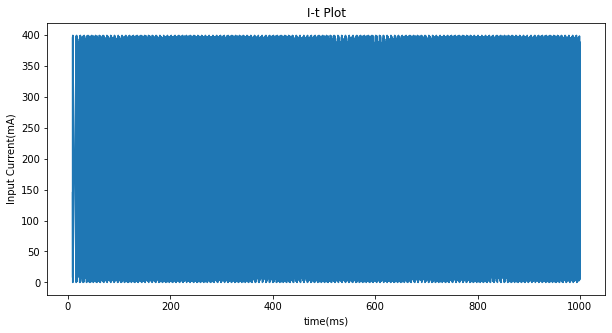

In [59]:
plt.figure(figsize=(10,5))
plt.plot(spike_exc1.t/ms, spike_exc1.i)
plt.ylabel('Input Current(mA)')
plt.xlabel('time(ms)')
plt.title('I-t Plot')
plt.show()

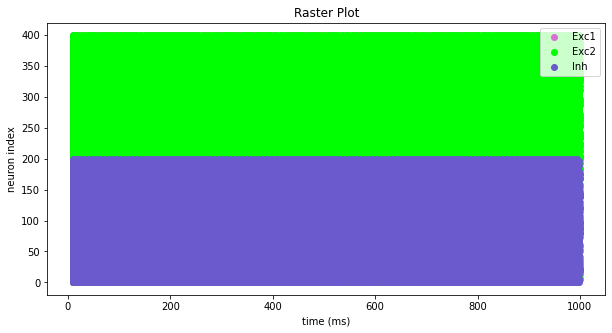

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(spike_exc1.t/ms,
           spike_exc1.i, label='Exc1', color=['orchid'])
plt.scatter(spike_exc2.t/ms,
           spike_exc2.i, label='Exc2', color=['lime'])
plt.scatter(spike_inh.t/ms,
           spike_inh.i, label='Inh', color=['slateblue'])

plt.legend()
plt.title('Raster Plot')
plt.xlabel('time (ms)')
plt.ylabel('neuron index')
plt.show()

In [49]:
print("spikes num of exc1 =" , spike_exc1.num_spikes)
print("spikes num of exc2 =" , spike_exc2.num_spikes)
print("spikes num of inh =" , spike_inh.num_spikes)

spikes num of exc1 = 23117
spikes num of exc2 = 66
spikes num of inh = 3733


In [50]:
R = 2
tau = 250 * ms
v_rest = -75
v_reset = -70
v_th = -50

In [64]:
start_scope()


eqs = '''
 dv/dt = ((v_rest-v) + (R*I)) /tau : 1
  I : 1
'''

I1 = []
I2 = []
I3 = []


for i in range(800):
  I1.append(random.random()*30)
  I2.append(random.random()*30)

for i in range(200):
  I3.append(random.random() *30)

  
exc_pop1 = NeuronGroup(800, eqs, threshold='v> v_th', reset='v = v_reset', method='exact')
exc_pop2 = NeuronGroup(800, eqs, threshold='v> v_th', reset='v = v_reset', method='exact')
inh_pop = NeuronGroup(200, eqs, threshold='v> v_th', reset='v = v_reset', method='exact')

exc_pop1.v = v_rest
exc_pop1.I = I1

exc_pop2.v = v_rest
exc_pop2.I = I2

inh_pop.v = v_rest
inh_pop.I = I3



S_e1 = Synapses(exc_pop1, exc_pop1, on_pre='v_post += 0.1')
S_e1.connect(p=0.05)

S_e2 = Synapses(exc_pop2, exc_pop2, on_pre='v_post += 0.02')
S_e2.connect(p=0.05)

S_ei1 = Synapses(exc_pop1, inh_pop, on_pre='v_post += 0.05')
S_ei1.connect(p=0.05)

S_ei2 = Synapses(exc_pop2, inh_pop, on_pre='v_post += 0.05')
S_ei2.connect(p=0.05)

S_i =  Synapses(inh_pop, inh_pop, on_pre='v_post -= 0.2')
S_i.connect(p=0.1)

state_mon1 = StateMonitor(exc_pop1, ["v"], record=True)
state_mon2 = StateMonitor(exc_pop2, ["v"], record=True)
state_mon3 = StateMonitor(inh_pop, ["v"], record=True)

spike_exc1 = SpikeMonitor(exc_pop1)
spike_exc2 = SpikeMonitor(exc_pop2)
spike_inh = SpikeMonitor(inh_pop)


run(1000*ms)

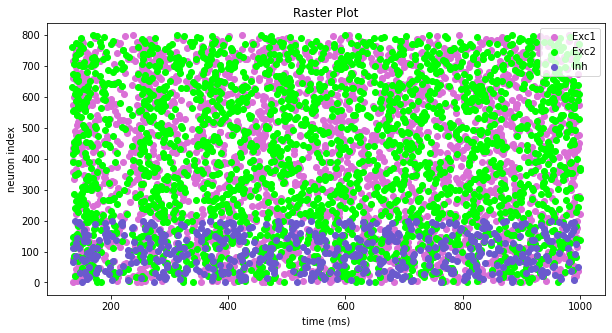

In [65]:
plt.figure(figsize=(10,5))
plt.scatter(spike_exc1.t/ms,
           spike_exc1.i, label='Exc1', color=['orchid'])
plt.scatter(spike_exc2.t/ms,
           spike_exc2.i, label='Exc2', color=['lime'])
plt.scatter(spike_inh.t/ms,
           spike_inh.i, label='Inh', color=['slateblue'])

plt.legend()
plt.title('Raster Plot')
plt.xlabel('time (ms)')
plt.ylabel('neuron index')
plt.show()

In [66]:
print("spikes num of exc1 =" , spike_exc1.num_spikes)
print("spikes num of exc2 =" , spike_exc2.num_spikes)
print("spikes num of inh =" , spike_inh.num_spikes)

spikes num of exc1 = 2602
spikes num of exc2 = 2270
spikes num of inh = 530
